In [1]:
# Libraries 

import random

import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Linear Regression Implementation

class LinearRegression:
    def __init__(self, learning_rate, n_iterations):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features) # Initializing as zeroes
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.n_iterations):
            # predicting value with current weights
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # Compute the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [3]:
# Metric Function 

def r2_score(y_true, y_pred):
    ssr = np.sum((y_true - y_pred) ** 2)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ssr / tss)
    return r2

In [4]:
# Synthetic data function

def generate_data(start, n_samples):
    X = np.arange(start, start + n_samples).reshape(-1, 1)
    
    y = 2 * X.flatten() + 1
    
    # Add Gaussian noise to y
    noise = np.random.normal(loc=0, scale=1, size=y.shape)  # Mean = 0, Stddev = 1
    y = y + noise

    return X, y

In [5]:
# Synthetic Training Data

X, y = generate_data(1, 100)

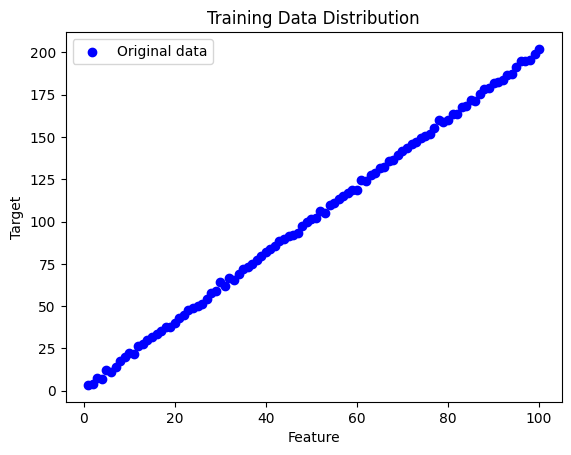

In [6]:
# let's visualize the training data

plt.scatter(X, y, color='blue', label='Original data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training Data Distribution')
plt.legend()
plt.show()

In [7]:
# Instantiate and train the model with a smaller learning rate.

model = LinearRegression(learning_rate=0.0001, n_iterations=100)
model.fit(X, y)

In [8]:
# Unseen Synthetic Data for testing

X_test, y_test = generate_data(120, 100)

In [9]:
# Make predictions

y_preds = model.predict(X_test)

In [10]:
# Model Metrics

r2 = round(r2_score(y_test, y_preds),3)
print(f"R Squared Score: {r2}")

R Squared Score: 0.995


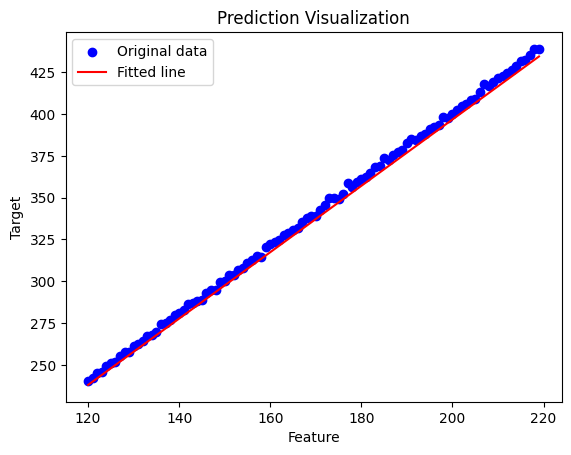

In [11]:
# let's visualize this data

plt.scatter(X_test, y_test, color='blue', label='Original data')
plt.plot(X_test, y_preds, color='red', label='Fitted line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Prediction Visualization')
plt.legend()
plt.show()